In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 14

In [56]:
train = pd.read_json('data/train.json')
genre_gn_all = pd.read_json('data/genre_gn_all.json', typ='series')
genre_gn_all = pd.DataFrame(genre_gn_all, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})
song_meta = pd.read_json('data/song_meta.json')

# 장르

In [57]:
# 장르코드 뒷자리 두 자리가 00인 코드를 필터링
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] == '00']
gnr_code

,gnr_code,gnr_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악
32,GN0600,록/메탈
39,GN0700,성인가요
50,GN0800,포크/블루스
56,GN0900,POP
65,GN1000,록/메탈


In [58]:
# 장르코드 뒷자리 두 자리가 00이 아닌 코드를 필터링
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] != '00']
dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)
dtl_gnr_code

,dtl_gnr_code,dtl_gnr_name
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
5,GN0105,'10-
...,...,...
247,GN2805,숙면유도
248,GN2806,반려동물
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬


In [59]:
#장르 코드 트리
# 앞자리 네 자리 공통코드 추출
gnr_code = gnr_code.assign(join_code = gnr_code['gnr_code'].str[0:4])
dtl_gnr_code = dtl_gnr_code.assign(join_code = dtl_gnr_code['dtl_gnr_code'].str[0:4])
# Merge
gnr_code_tree = pd.merge(gnr_code, dtl_gnr_code,how = 'left', on = 'join_code')
gnr_code_tree.drop(['join_code'], inplace = True, axis = 1)
gnr_code_tree

,gnr_code,gnr_name,dtl_gnr_code,dtl_gnr_name
0,GN0100,발라드,GN0101,세부장르전체
1,GN0100,발라드,GN0102,'80
2,GN0100,발라드,GN0103,'90
3,GN0100,발라드,GN0104,'00
4,GN0100,발라드,GN0105,'10-
...,...,...,...,...
220,GN2800,뮤직테라피,GN2806,반려동물
221,GN2900,뮤지컬,GN2901,세부장르전체
222,GN2900,뮤지컬,GN2902,국내뮤지컬
223,GN2900,뮤지컬,GN2903,국외뮤지컬


In [60]:
# 세부장르 종류
gnr_code_tree['dtl_gnr_name'].unique()

array(['세부장르전체', "'80", "'90", "'00", "'10-", '랩 스타일', '보컬 스타일',
       '언더그라운드 힙합', '시대별', '어반', 'R&B', '포크', '록', '일렉', '힙합', '발라드',
       "'70", '신세대트로트', '전설의트로트', '뽕짝트로트', '트로트메들리', "트로트'60-'70",
       "트로트'80-'90", "트로트'00-", "성인가요'80-'90", "성인가요'00-", "'60-'70",
       "'80-'90", '얼터너티브팝', '올디스', '월드팝', '모던록', '얼터너티브록', '프로그레시브/아트록',
       '하드록', '헤비메탈', '뉴메탈/하드코어', '포스트록', "'60", '일렉트로니카', '하우스', '클럽뮤직',
       '일렉트로닉팝', '팝랩', '얼터너티브힙합', '갱스터/하드코어랩', 'East&West', '컨템포러리 R&B',
       '소울', '블루스', '컨트리', "'00-", '국내영화', '국외영화', '국내드라마', '국외드라마',
       '애니메이션/게임', '국내뮤지컬', '국외뮤지컬', '애니메이션/웹툰', '게임', '관현악', '교향곡',
       '실내악', '협주곡', '독주곡', '오페라', '크로스오버', '현대음악', '성악/합창곡', '발레/무용',
       '지휘/연주자', '컴필레이션', '교향/관현악', '오페라/성악', '보컬재즈', '애시드/퓨전/팝', 'Bop',
       '보사노바', 'J-Jazz', '라틴재즈', '빅밴드/스윙', '악기별', '이지리스닝', 'J-Newage',
       '기능성음악', '기타', '피아노', 'POP', '랩/힙합', 'R&B/Soul', '시부야케이', '뉴에이지',
       '재즈', '힙합/R&B', "'00-'10", '샹송/프렌치팝', '칸초네/이탈리안팝', '중국음악',
       '켈틱/아이리시'

In [61]:
gnr_code_tree[gnr_code_tree['gnr_name'] == '일렉트로니카']

,gnr_code,gnr_name,dtl_gnr_code,dtl_gnr_name
70,GN1100,일렉트로니카,GN1101,세부장르전체
71,GN1100,일렉트로니카,GN1102,일렉트로니카
72,GN1100,일렉트로니카,GN1103,하우스
73,GN1100,일렉트로니카,GN1104,클럽뮤직
74,GN1100,일렉트로니카,GN1105,일렉트로닉팝
75,GN1100,일렉트로니카,GN1106,'80
76,GN1100,일렉트로니카,GN1107,'90
77,GN1100,일렉트로니카,GN1108,'00
78,GN1100,일렉트로니카,GN1109,'10-
207,GN2600,일렉트로니카,GN2601,세부장르전체


# playlist

In [103]:
train.head(5)

,tags,id,plylst_title,songs,like_cnt,updt_date,song_count
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,28
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,38
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,53


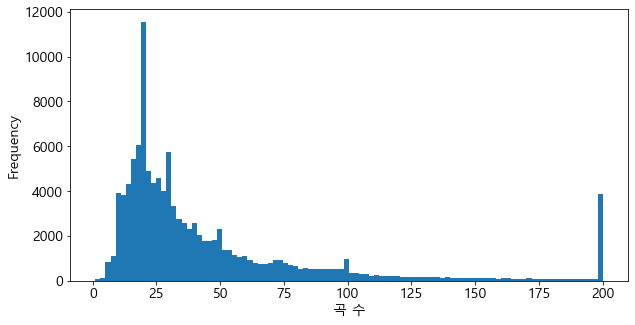

In [62]:
#플레이 리스트 곡 수 세기
train['song_count'] = train[['songs']].applymap(lambda x: len(x))
plt.figure(figsize =(10,5))
plt.xlabel('곡 수')
plt.rcParams['font.size'] = 14
train['song_count'].plot.hist(bins= 100)
plt.show()

### 플레이 리스트에 들어가있는 중복을 제외한 곡 수는 ?

In [107]:
len(set(np.concatenate(train['songs'].values)))

615142

### 플레이 리스트 중복을 제외한 태그 수는 ?

In [113]:
tag_list = set(np.concatenate(train['tags'].values))
len(tag_list)

29160

### 비슷한 태그는 얼마나 있을까

In [168]:
temp=[]
for tag in tag_list:
    if tag.startswith('pop'):
        temp.append(tag)
temp

['pops',
 'poptop100',
 'pop모집',
 'popsong',
 'popmusic',
 'pop등',
 'pop학사전',
 'popchart',
 'pop추천',
 'pop인기']

In [120]:
temp=[]
for tag in tag_list:
    if tag.startswith('락'):
        temp.append(tag)
temp

['락페스티벌',
 '락락락',
 '락메탈',
 '락발라드',
 '락_입문서',
 '락가스펠',
 '락밴드',
 '락발',
 '락발라드전설',
 '락카페',
 '락커',
 '락이즈얼라이브',
 '락덕후',
 '락은우리의주위에',
 '락페',
 '락음악',
 '락스피릿',
 '락인기',
 '락큰롤',
 '락페의',
 '락한남자',
 '락스피릿을_깨우는_ROCK',
 '락음악추천',
 '락의_매력에_빠져보고_싶을때',
 '락힙합',
 '락페스트벌',
 '락스타게임즈',
 '락볼링장',
 '락뮤직',
 '락의선성시대',
 '락사운드',
 '락덕',
 '락Top100',
 '락커본능',
 '락앤롤',
 '락스타',
 '락추천',
 '락보컬리스트',
 '락',
 '락킹',
 '락모음',
 '락차트']

In [121]:
temp=[]
for tag in tag_list:
    if tag.startswith('발라드'):
        temp.append(tag)
temp

['발라드스테디',
 '발라드추천',
 '발라드팝',
 '발라드는',
 '발라드모음',
 '발라드랩',
 '발라드신곡',
 '발라드곡',
 '발라드는아니지만갓아모르파티',
 '발라드팝송',
 '발라드및',
 '발라드에',
 '발라드댄스',
 '발라드핫트랙',
 '발라드찾기',
 '발라드추천곡',
 '발라드감성',
 '발라드힙합',
 '발라드아닌',
 '발라드림',
 '발라드목록',
 '발라드OST',
 '발라드_1',
 '발라드락',
 '발라드가_많아서_미안해요',
 '발라드가나와',
 '발라드의신',
 '발라드_2',
 '발라드의민족',
 '발라드_3',
 '발라드명곡',
 '발라드탑백',
 '발라드',
 '발라드삼대장',
 '발라드돌']

In [167]:
temp=[]
for tag in tag_list:
    if tag.startswith('아이돌'):
        temp.append(tag)
temp

['아이돌유닛',
 '아이돌캐롤',
 '아이돌솔로곡',
 '아이돌학교',
 '아이돌노래모음',
 '아이돌명곡모음',
 '아이돌여름노래',
 '아이돌추천곡',
 '아이돌크리스마스',
 '아이돌그룹',
 '아이돌의숨은명곡',
 '아이돌숨겨진띵곡',
 '아이돌음악',
 '아이돌팬송',
 '아이돌이넘많타',
 '아이돌원조',
 '아이돌탄생',
 '아이돌의숨은명곡돌',
 '아이돌숨은명곡들돌',
 '아이돌발라드',
 '아이돌과인디밴드',
 '아이돌',
 '아이돌댄스노래',
 '아이돌솔로',
 '아이돌일본곡',
 '아이돌밴드',
 '아이돌노래',
 '아이돌1세기',
 '아이돌이부른곡',
 '아이돌댄스',
 '아이돌OST',
 '아이돌메이커',
 '아이돌노래는_거의_없어요',
 '아이돌표발라드',
 '아이돌흥하자',
 '아이돌래퍼',
 '아이돌위주',
 '아이돌_여름노래',
 '아이돌숨은명곡들',
 '아이돌명곡',
 '아이돌_명곡',
 '아이돌숨은갬성곡',
 '아이돌탐구생활',
 '아이돌노래돌',
 '아이돌수록곡',
 '아이돌의발라드',
 '아이돌겨울노래',
 '아이돌숨은명곡']

> 비슷한 태그를 통합해야 하는가?  
> 붙여서 쓴 태그를 구분 해야하나?

In [101]:
# 플레이리스트 아이디(id)와 수록곡(songs) 추출
plylst_song_map = train[['id', 'songs']]

# unnest songs
plylst_song_map_unnest = np.dstack(
    (
        np.repeat(plylst_song_map.id.values, list(map(len, plylst_song_map.songs))), 
        np.concatenate(plylst_song_map.songs.values)
    )
)

# unnested 데이터프레임 생성 : plylst_song_map
plylst_song_map = pd.DataFrame(data = plylst_song_map_unnest[0], columns = plylst_song_map.columns)
plylst_song_map['id'] = plylst_song_map['id'].astype(str)
plylst_song_map['songs'] = plylst_song_map['songs'].astype(str)

# unnest 객체 제거
del plylst_song_map_unnest

In [102]:
# 플레이리스트 아이디(id)와 매핑된 태그(tags) 추출
plylst_tag_map = train[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values) #리스트를 전부 합쳐서 하나의 리스트로. 들어가는건 리스트의 리스트
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest 객체 제거
del plylst_tag_map_unnest

# song meta

In [133]:
song_meta.head(5)

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


### 중복된 노래가 있나?
- 제목과 가수가 일치하면 같은 노래라고 판단

In [134]:
title_artist_df = song_meta[['song_name','artist_name_basket']]
title_artist_df['artist_name_basket'] = title_artist_df['artist_name_basket'].map(lambda x: " ".join(x))

In [151]:
#중복된 노래 개수
len(song_meta) - len(title_artist_df.drop_duplicates())

84277

In [149]:
song_meta[title_artist_df.duplicated(keep=False)].sort_values('song_name')\
[['issue_date','song_gn_gnr_basket','album_name','song_name','artist_name_basket']].head(20)

,issue_date,song_gn_gnr_basket,album_name,song_name,artist_name_basket
97218,20190809,[GN1200],!,!,[Trippie Redd]
384892,20190808,[GN1200],!,!,[Trippie Redd]
631373,20131227,[GN0200],오늘,! (느낌표),[오늘 (Today)]
352018,20140128,[GN0200],졸업,! (느낌표),[오늘 (Today)]
228114,20170107,"[GN0500, GN0600]",우연의 연속에 의한 필연,#,[끝없는잔향속에서우리는]
176984,20170921,"[GN0500, GN0800]",포크라노스 컴필레이션 Vol.1 `EMERGING`,#,[끝없는잔향속에서우리는]
551475,19950815,[GN1000],Garbage,#1 Crush,[Garbage]
697292,20070724,"[GN0900, GN1000]",Absolute Garbage,#1 Crush,[Garbage]
132654,20110829,"[GN0900, GN1000]",Night Shades (Deluxe),#1Nite (One Night),[Cobra Starship]
509191,20120613,[GN0900],#1Nite (One Night) (Album Ver.),#1Nite (One Night),[Cobra Starship]


서로 다른 앨범에 수록되며 중복이 발생하고  
장르가 추가되는 경우가 생김.

> 플레이리스트에 같은 곡이 다르게 들어간 경우는 얼마나 있나?  
  이를 하나의 곡으로 통일 해야 하나?

In [169]:
# 곡 아디스트 수
# song_meta[['artist_name_basket']].applymap(lambda x : len(x)).value_counts(normalize=True) * 100
song_meta['artist_name_basket']

,artist_name_basket
0,[Various Artists]
1,[Murray Perahia]
2,[Peter Gabriel]
3,[Matoma]
4,[Jude Law]
...,...
707984,[Fela Kuti]
707985,[Cyndi Lauper]
707986,[윤종신]
707987,[Nature Piano]


- 대부분 한명.  4명 이상부터는 거의 없다.

In [152]:
#얼마나 많은 장르를 가지는가
song_meta[['song_gn_dtl_gnr_basket']].applymap(lambda x : len(x)).value_counts().sort_index()

song_gn_dtl_gnr_basket
0                           4037
1                         218835
2                         292539
3                         106497
4                          46259
5                          37238
6                           1207
7                            927
8                            210
9                             71
10                           148
11                            17
12                             4
dtype: int64

- 장르가 없는 노래가 있다.

In [174]:
# 디테일 장르가 없는 노래들
song_meta[song_meta['song_gn_dtl_gnr_basket'].map(lambda x : len(x) < 1)].head(50)

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
21,[],20200331,WHY,10410508,[417985],WHY,[],[4minute],21
262,[],20150318,노년의 건강을 지켜주는 음악 처방전 (부제 : 휴식 때 들으면 좋은 음악친구),2309524,[726909],Bio Sound `Breathing & Big Bell`,[GN9000],[차병원],262
399,[],20200106,뽀로로 겨울 동요,10372098,[1703695],초코 초코 핫초코,[],[아이코닉스 (ICONIX)],399
454,[],20191108,MAGDALENE,10349014,[788767],thousand eyes,[GN1100],[FKA Twigs],454
803,[],20040901,Tropical Lullaby,153435,[848353],Kalua Lullaby,[],[The Moonlighters],803
916,[],20170825,크리스마스의 기적,10090652,[750416],Springtime In December,[GN9000],[Larry Warren],916
1074,[],20131128,Open It Up,10008901,[1221466],Open It Up,[GN9000],[Tchengiz],1074
1089,[],20190924,66,10331496,[2747498],How are you,[],[유노이아 (Eunoia)],1089
2061,[],20200416,주의 집에 거하는 자,10417840,[2295323],주의 집에 거하는 자 (Blessed),[GN2100],[예람워십],2061
2205,[],20161130,크리스마스 하프 감성 연주곡 베스트,10019367,[923656],고요한 밤 거룩한 밤 (Silent Night Holy Night) (크리스마스 하프),[GN9000],[크리스마스 캐롤송],2205


- 장르 대분류도 없는 곡들이 있다.

> 대분류가 있는 곡들의 세부분류를 각 분류 01번으로 채운다?  
> 장르가 없는 곡의 처리는?